# Euler forward and backward and Crank-Nicolson

In this version, the solution $\mathbf{u}$ is returned
as a matrix where one row corresponds to the solution
at one particular time step. Columns correspond to
individual components of the solution.

In [131]:
function [t,u] = ForwardEuler(f, tRange, u0, N)
% Use forward (explicit) Euler to solve a system of first order
% ODEs of the form u'=f(t,u). Here f = name of an m-file which
% defines "du = f(u,t)" to compute the RHS of the ODE as a row
% vector. tRange = [t0,t1], where the solution will be computed
% for t0<=t<=t1. Also
% u0 = column vector of initial values for u at t0
% N  = number of equally-sized steps from t0 to t1
% t  = row vector of values of t
% u  = matrix whose n-th row is the approx. solution at t(n).

  t       = zeros(N+1,1);                     % initialize t
  t(1)    = tRange(1);
  h       = (tRange(2)-tRange(1))/N;
  u(1, :) = u0;                               % u0 (transpose)
  for k = 1 : N
    t(k+1)    = t(k) + h;
    u(k+1, :) = u(k, :) + h * feval(f, t(k), u(k, :));
  end
endfunction

In [132]:
function [t,u] = BackwardEuler(f, tRange, u0, N)
% Use backward (implicit) Euler to solve a system of first order
% ODEs of the form u'=f(t,u). Here f = name of an m-file which
% defines "du = f(u,t)" to compute the RHS of the ODE as a row
% vector. tRange = [t0,t1], where the solution will be computed
% for t0<=t<=t1. Also
% u0 = column vector of initial values for u at t0
% N  = number of equally-sized steps from t0 to t1
% t  = row vector of values of t
% u  = matrix whose n-th row is the approx. solution at t(n).

  t       = zeros(N+1,1);                     % initialize t
  t(1)    = tRange(1);
  h       = (tRange(2)-tRange(1))/N;
  u(1, :) = u0;                               % u0 (transpose)
  for k = 1 : N
    t(k+1)   = t(k) + h;
    options  = optimset('Display','off');
    [u(k+1, :), Fval, exitflag]  = fsolve(@(x) x - u(k, :) - ...
      h*feval(f, t(k+1), x), u(k, :),options);
  end
endfunction

In [134]:
function [t,u] = CrankNicolson(f, tRange, u0, N)
% Use Crank-Nicolson (trapezoidal rule) to solve a system of
% first order % ODEs of the form u'=f(t,u). Here f = name of
% an m-file which defines "du = f(u,t)" to compute the RHS of
% the ODE as a row vector. tRange = [t0,t1], where the u(t)
% will be computed for t0<=t<=t1. Also
% u0 = column vector of initial values for u at t0
% N  = number of equally-sized steps from t0 to t1
% t  = row vector of values of t
% u  = matrix whose n-th row is the approx. solution at t(n).

  t       = zeros(N+1,1);                     % initialize t
  t(1)    = tRange(1);
  h       = (tRange(2)-tRange(1))/N;
  u(1, :) = u0;                               % u0 (transpose)
  for k = 1 : N
    t(k+1)   = t(k) + h;
    options  = optimset('Display','off');
    [u(k+1, :),Fval,exitflag]  = fsolve(@(x) x - u(k, :) - ...
      h/2*(feval(f, t(k), u(k, :)) + feval(f, t(k+1), x)),...
      u(k, :),options);
  end
endfunction

# Predator-Prey problem from slides 11+12/23

In [145]:
r0=300;
f0=150;
alpha=0.01;
PredPrey01=@(t,x) [2*(1-0/R)*x(1)-alpha*x(1)*x(2) ...
                      -x(2)+alpha*x(1)*x(2)];

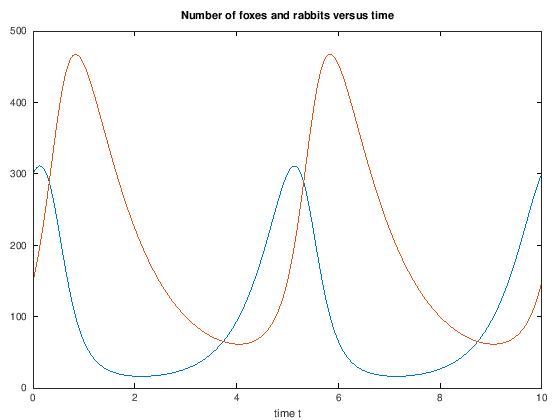

In [146]:
x0=[r0 f0];
opts=odeset("RelTol",1e-8,"AbsTol",1e-8);
[t,x]=ode45(PredPrey01,[0 10], x0, opts);
plot(t,x);
title('Number of foxes and rabbits versus time');
xlabel('time t');

We can visualize the situation more clearly in the so called
phaseplot: the population at every time is depicted as a point
in the $x/y$-plane. The $x$-coordinate corresponds to the
number of rabbits and the $y$-coordinate corresponds to the
number of foxes at a particular time.

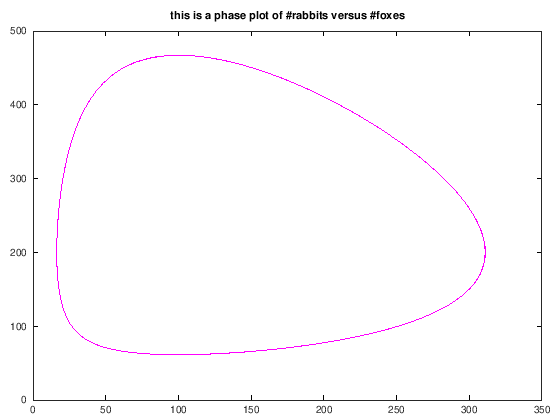

In [147]:
plot(x(:,1),x(:,2),'-m')
title('this is a phase plot of #rabbits versus #foxes');

Let's try Crank-Nicolson

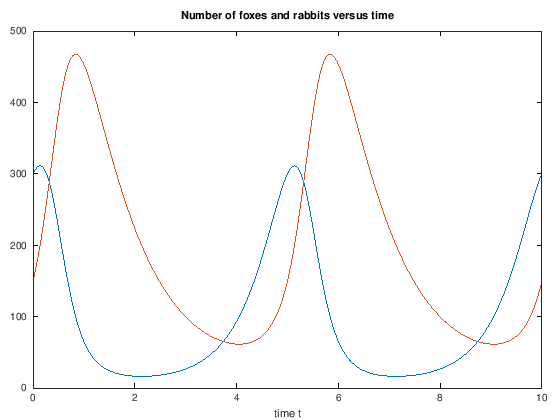

In [148]:
[t,xCN]=CrankNicolson(PredPrey01, [0 10], x0, N=1000);
plot(t,xCN);
title('Number of foxes and rabbits versus time');
xlabel('time t');

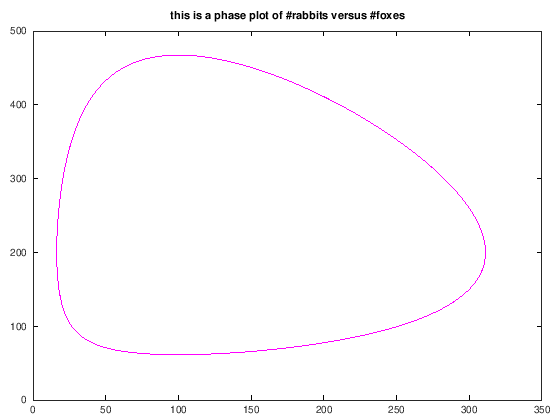

In [149]:
plot(xCN(:,1),xCN(:,2),'-m')
title('this is a phase plot of #rabbits versus #foxes');

Now let's see, what happens if we change the initial conditions

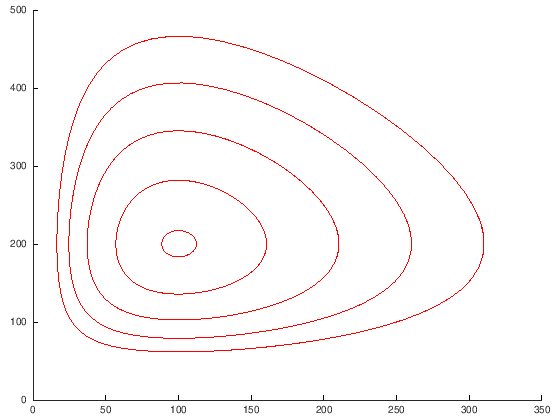

In [150]:
figure;
hold on
for r0 = [110 160 210 260 310]
    for f0 = [210]
        x0 = [r0 f0];
        [t,x]=ode45(PredPrey01, [0 10], x0,opts);
        plot(x(:,1),x(:,2),'-r')
        hold on
    end
end

# Orbit of a satellite

In [156]:
function ydot = TwoBody(t,y)
  r    = sqrt(y(1)^2 + y(2)^2);
  ydot = [y(2) -y(1)/r^3 y(4) -y(3)/r^3];
endfunction

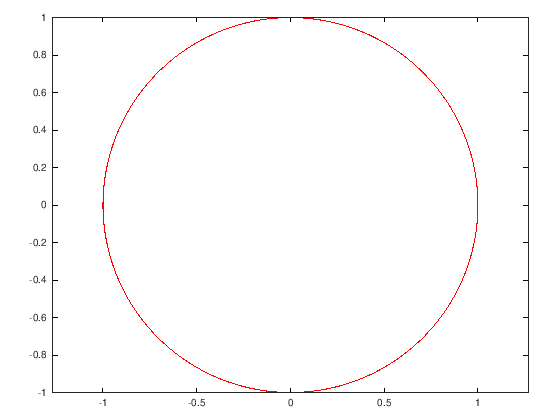

In [157]:
y0 = [1 0 0 1]';

opts=odeset("RelTol",1e-8,"AbsTol",1e-8);
[t, y] = ode45('TwoBody',[0,16*pi],y0,opts);
plot(y(:,1),y(:,3),'r-');
axis equal

Now let's see, how accurate Euler forward, Euler backward
and Crank-Nicolson are at computing the orbit. We'll see,
that our methods are far too inaccurate. Actually, only
Crank-Nicolson "preserves" energy and brings the satellite
back to its start position after one revolution.

In [160]:
function ComputeOrbits
  
  y0 = [1 0 0 1];

  N  = 50;
  [t, y] = ForwardEuler('TwoBody',[0,pi],y0,N);
  plot(y(:,1),y(:,3),'g-');
  hold on

  N  = 100;
  [t, y] = ForwardEuler('TwoBody',[0,pi],y0,N);
  plot(y(:,1),y(:,3),'c-');

  N  = 50;
  [t, y] = BackwardEuler('TwoBody',[0,pi],y0,N);
  plot(y(:,1),y(:,3),'b-');

  N  = 100;
  [t, y] = BackwardEuler('TwoBody',[0,pi],y0,N);
  plot(y(:,1),y(:,3),'m-');

  N  = 100;
  [t, y] = CrankNicolson('TwoBody',[0,2*pi],y0,N);
  plot(y(:,1),y(:,3),'r-');

  axis equal
  xlabel('u'), ylabel('v')
  axis([-1.5,1.8,-1.5,1.5])

  plot(0,0,'ko')
  plot(1,0,'ro')

  legend('fwEu-50','fwEu-100','bkEu-50','bkEu-100','CrNi-100')
endfunction

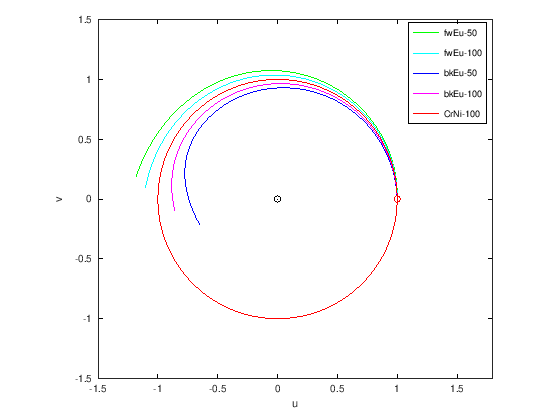

In [161]:
ComputeOrbits